Step 5: Write a script that computes the FastText embedding vector of each abstract as well as the Fasttext embedding of the topic description

Examples gotten from: https://stackabuse.com/python-for-nlp-working-with-facebook-fasttext-library/

In [5]:
from keras.preprocessing.text import Tokenizer
from gensim.models.fasttext import FastText
import numpy as np
import matplotlib.pyplot as plt
import nltk
from string import punctuation
from sklearn.decomposition import PCA
import pandas as pd

In [6]:
topics = {
  "mk": "Musculoskeletal Radiology",
  "ct": "Computed Tomography",
  "br": "Breast Imaging",
  "gu": "Geritourinary Radiology",
  #"us": "Ultrasound",
  "ch": "Chest Radiology",
  "ir": "Interventional Radiology",
}

In [7]:
def read_data(index):
    """
    read given index of data
    """
    if index in topics:
        data = np.array(pd.read_excel("database100_preprocessed.xlsx", sheet_name=index).abstract)
        data = np.append(data, pd.read_excel("database100_preprocessed.xlsx", sheet_name=index).title)

        final_corpus = [sentence for sentence in data if sentence.strip() !='']

        word_punctuation_tokenizer = nltk.WordPunctTokenizer()
        word_tokenized_corpus = [word_punctuation_tokenizer.tokenize(abstract) for abstract in final_corpus]

        return word_tokenized_corpus

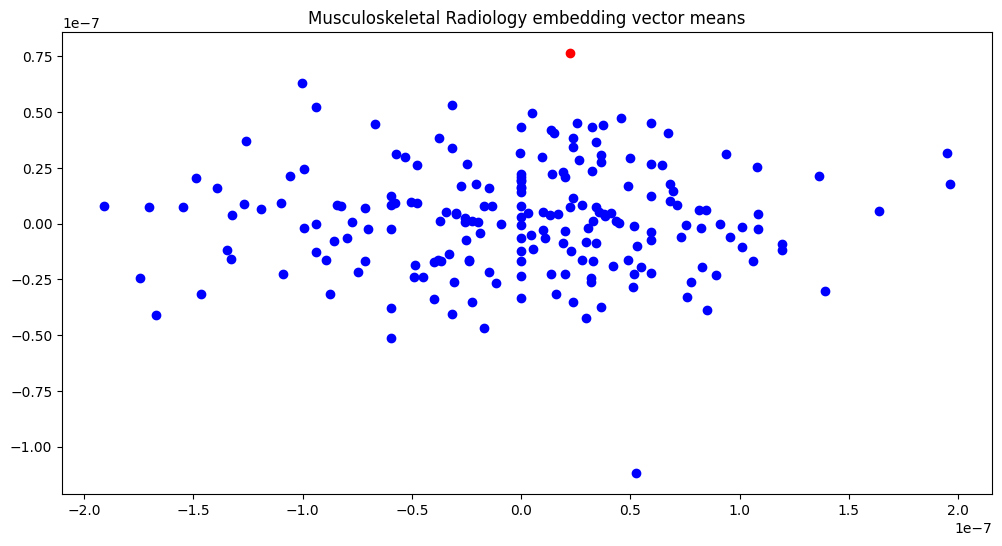

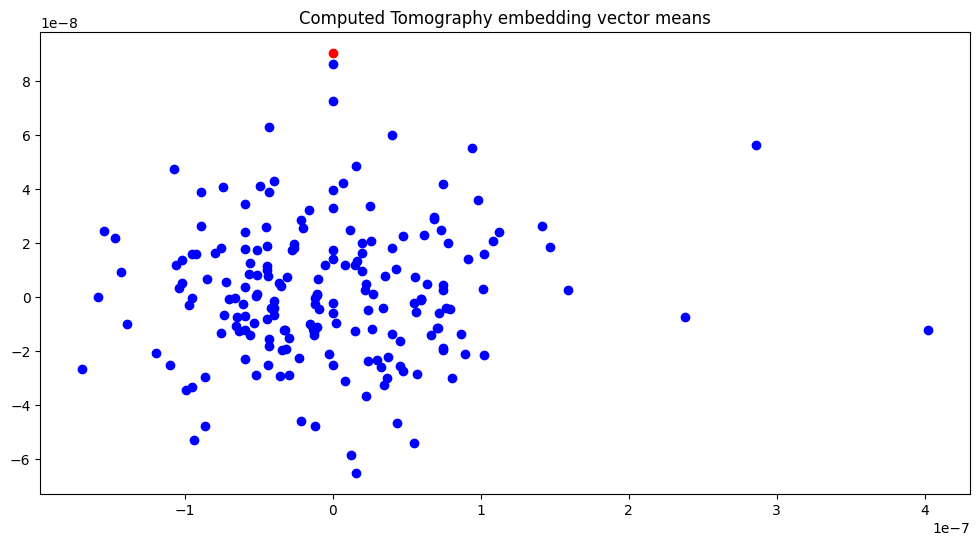

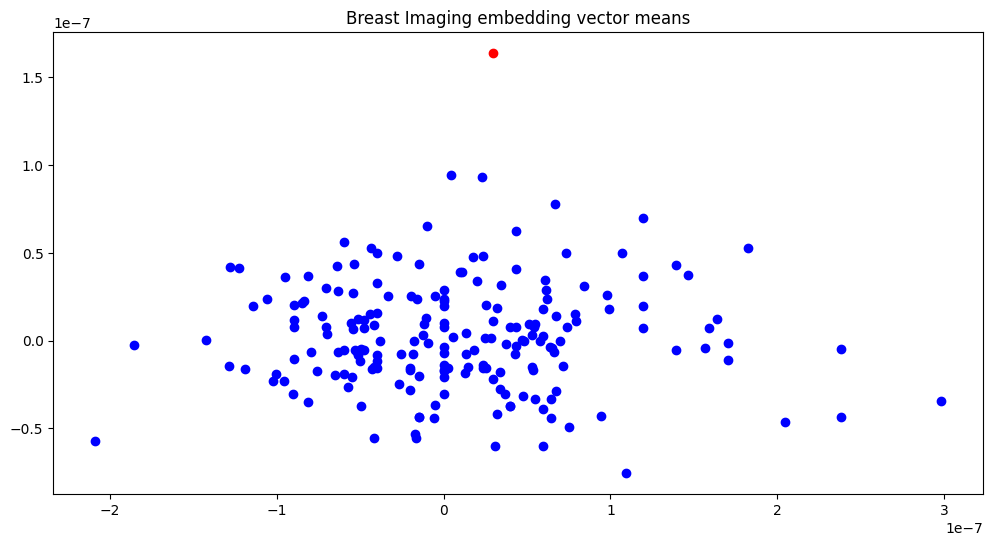

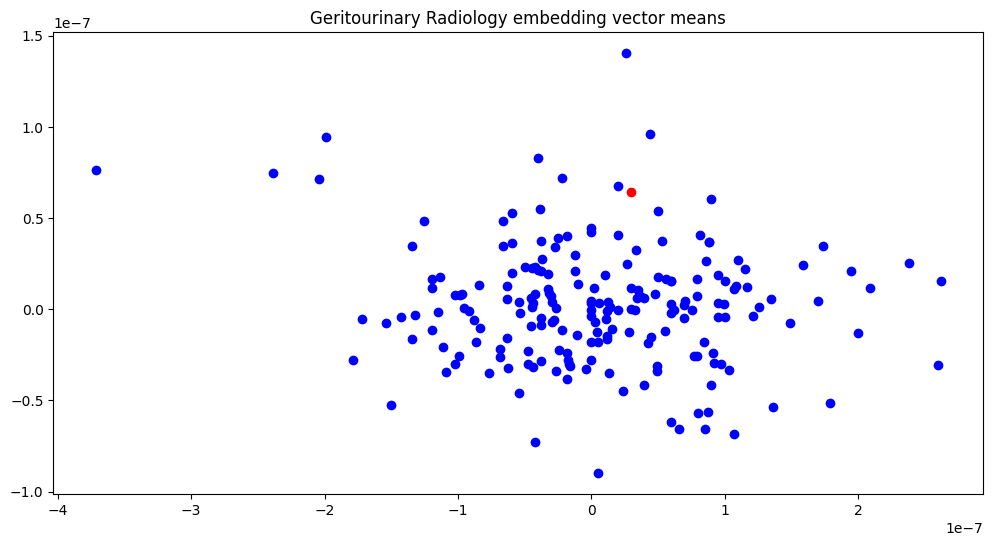

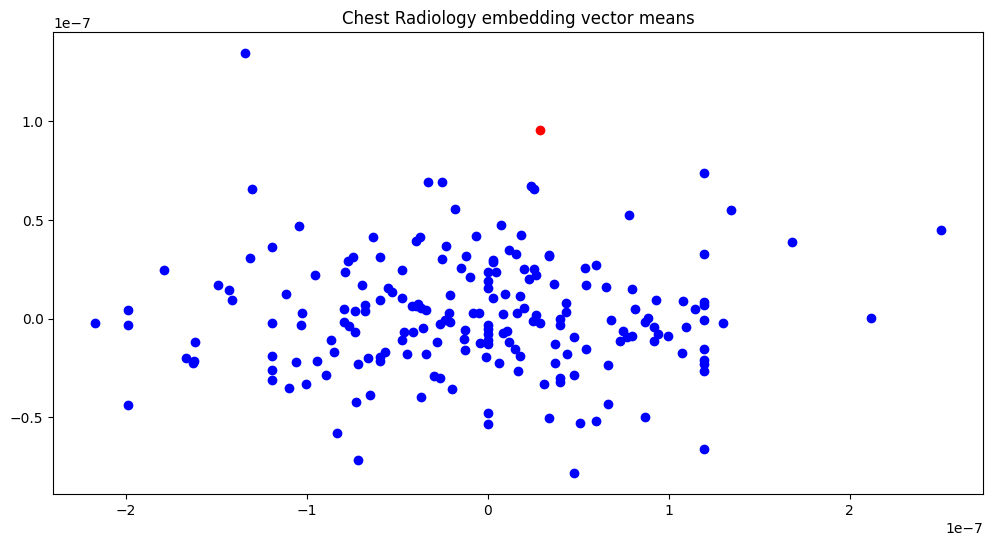

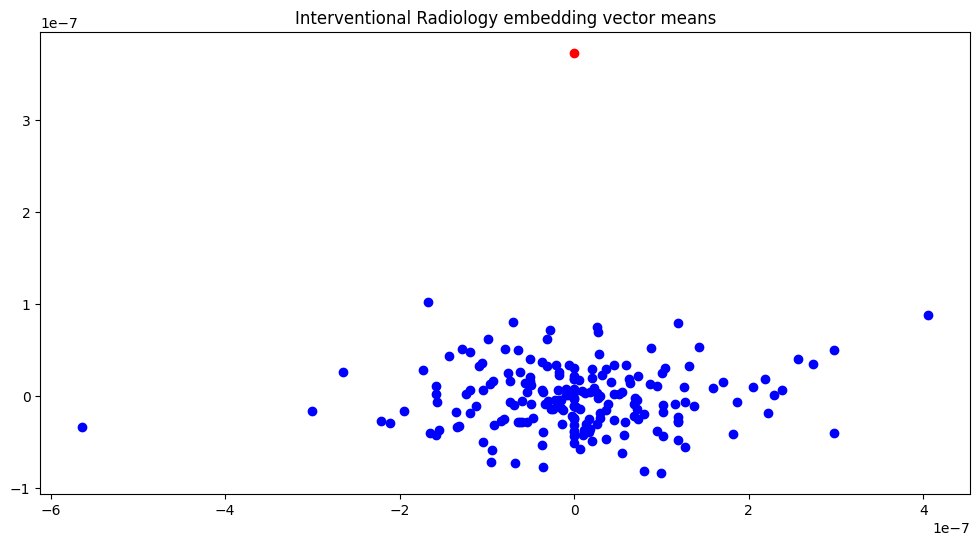

In [8]:
pca = PCA(n_components=2)

# iterate through all topics
for topic in topics:
    # get abstracts and topics
    topic_titles = topics[topic].lower().split(" ")
    abstracts = read_data(topic)
    vector_means = np.array([]) # initialize list for visualization
    # create model
    ft_model = FastText(vector_size=60, window=40, min_count=1, sentences=abstracts, epochs=10)
    # iterate alle abs for each topic
    for abstract in abstracts:
        # calculate embed vectors and means
        
        word_vectors = ft_model.wv[abstract]
        two_dim_vectors = pca.fit_transform(word_vectors)
        vector_means = np.append(vector_means, np.mean(two_dim_vectors, axis=0))
    vector_means = vector_means.reshape(-1, 2)

    # reference point from topic
    ref_vector = ft_model.wv[topic_titles]
    two_dim_ref_vector = pca.fit_transform(ref_vector)
    mean_ref_vector = np.mean(two_dim_ref_vector, axis=0)

    # visualize
    plt.figure(figsize=(12, 6))
    plt.scatter(vector_means[:, 0], vector_means[:, 1], c='blue')
    plt.scatter(mean_ref_vector[0], mean_ref_vector[1], c='red')
    plt.title(topics[topic] + " embedding vector means")